In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df_rf_25 = pd.read_csv("../data/many_models_random_forest_025.csv")
df_rf_50 = pd.read_csv("../data/many_models_random_forest_050.csv")
df_rf_100 = pd.read_csv("../data/many_models_random_forest_100.csv")
df_rf = pd.concat([df_rf_25, df_rf_50, df_rf_100])

In [ ]:
df_random = pd.read_csv("../data/random_portfolio_200_securities_returns.csv")

In [ ]:
df_rf

,model_family,model_name,n_estimators,criterion,max_depth,max_features,accuracy,precision,recall,roc_auc,hp_ann_ret,hp_sharpe,top_200_ann_ret,top_200_sharpe
0,random_forest,"RandomForestClassifier(max_depth=2, n_estimato...",25,gini,2,sqrt,0.514364,0.510488,0.567998,0.520516,0.090292,0.678704,0.110566,0.719038
1,random_forest,"RandomForestClassifier(max_depth=2, max_featur...",25,gini,2,log2,0.514455,0.510264,0.578797,0.520797,0.096859,0.703448,0.125857,0.808330
2,random_forest,"RandomForestClassifier(max_depth=2, max_featur...",25,gini,2,NaN,0.513612,0.509089,0.609784,0.520908,0.090553,0.659908,0.093504,0.629765
3,random_forest,"RandomForestClassifier(max_depth=2, max_featur...",25,gini,2,0.1,0.513839,0.509718,0.582587,0.521138,0.086055,0.648871,0.113040,0.700245
4,random_forest,"RandomForestClassifier(max_depth=2, max_featur...",25,gini,2,0.25,0.513430,0.508658,0.629219,0.520514,0.081133,0.620561,0.109566,0.688820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,random_forest,"RandomForestClassifier(criterion='log_loss', m...",100,log_loss,14,NaN,0.522077,0.518533,0.540872,0.531265,0.102578,0.710258,0.172638,0.919325
143,random_forest,"RandomForestClassifier(criterion='log_loss', m...",100,log_loss,14,0.1,0.519567,0.515928,0.544590,0.527346,0.099576,0.707332,0.148563,0.809839
144,random_forest,"RandomForestClassifier(criterion='log_loss', m...",100,log_loss,14,0.25,0.520314,0.516574,0.547201,0.528351,0.105384,0.738849,0.169309,0.925208
145,random_forest,"RandomForestClassifier(criterion='log_loss', m...",100,log_loss,14,0.5,0.520385,0.516821,0.541674,0.528604,0.103782,0.735062,0.164219,0.872942


In [ ]:
df_rf[["hp_ann_ret","top_200_ann_ret"]].describe(percentiles=[0.025, 0.10, 0.50, 0.90, 0.975]) 

,hp_ann_ret,top_200_ann_ret
count,441.000000,441.000000
mean,0.094854,0.149464
std,0.006897,0.025328
min,0.070798,0.053696
2.5%,0.079189,0.095961
10%,0.084815,0.110740
50%,0.096122,0.155565
90%,0.102405,0.177331
97.5%,0.104978,0.185622
max,0.108948,0.193460


In [ ]:
df_random[["returns"]].describe(percentiles=[0.025, 0.10, 0.50, 0.90, 0.975])

,returns
count,1000.000000
mean,0.080078
std,0.019941
min,0.036929
2.5%,0.048913
10%,0.057390
50%,0.076924
90%,0.109125
97.5%,0.123900
max,0.166622


<Axes: >

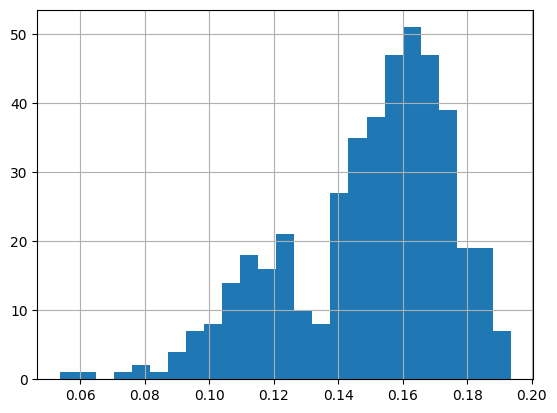

In [ ]:
df_rf["top_200_ann_ret"].hist(bins=25)

<Axes: >

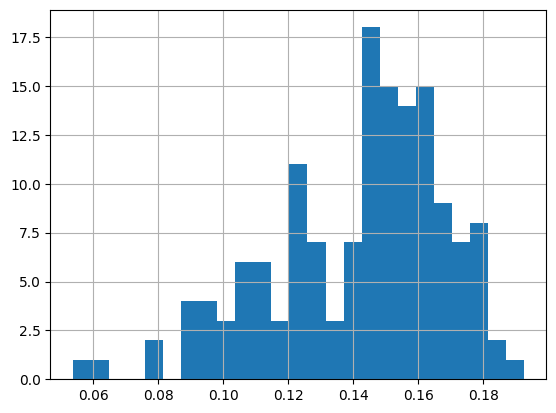

In [ ]:
df_rf.query("n_estimators==25")["top_200_ann_ret"].hist(bins=25)

In [ ]:
df_rf.query("n_estimators==25")["top_200_ann_ret"].describe(percentiles=(0.025, 0.50, 0.975))

count    147.000000
mean       0.141429
std        0.027013
min        0.053696
2.5%       0.085340
50%        0.147210
97.5%      0.180469
max        0.192475
Name: top_200_ann_ret, dtype: float64

<Axes: >

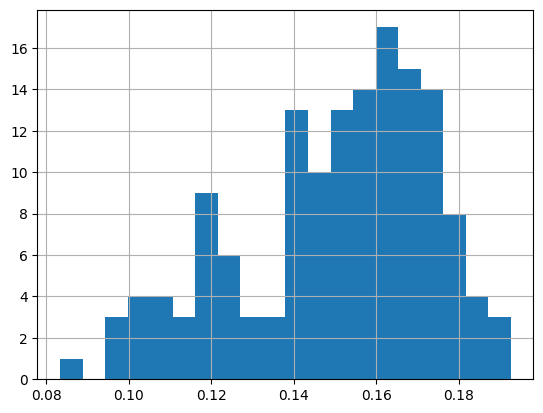

In [ ]:
df_rf.query("n_estimators==50")["top_200_ann_ret"].hist(bins=20)

In [ ]:
df_rf.query("n_estimators==50")["top_200_ann_ret"].describe(percentiles=(0.025, 0.50, 0.975))

count    147.000000
mean       0.149972
std        0.023591
min        0.083324
2.5%       0.099086
50%        0.154798
97.5%      0.185267
max        0.192609
Name: top_200_ann_ret, dtype: float64

<Axes: >

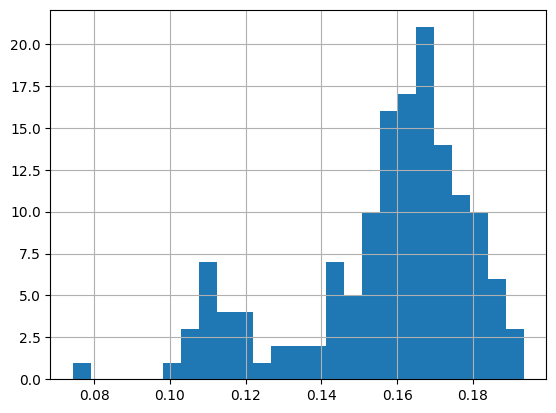

In [ ]:
df_rf.query("n_estimators==100")["top_200_ann_ret"].hist(bins=25)

In [ ]:
df_rf.query("n_estimators==100")["top_200_ann_ret"].describe(percentiles=(0.025, 0.50, 0.975))

count    147.000000
mean       0.156991
std        0.022907
min        0.074432
2.5%       0.106406
50%        0.162198
97.5%      0.186790
max        0.193460
Name: top_200_ann_ret, dtype: float64

In [ ]:
df_rf.groupby(["criterion"])[["top_200_ann_ret"]].mean()

,top_200_ann_ret
criterion,
entropy,0.151607
gini,0.146230
log_loss,0.150554


In [ ]:
#df_rf.groupby(["max_depth"])[["top_200_ann_ret"]].mean().reset_index().plot(x="max_depth", y="top_200_ann_ret", kind)

In [ ]:
#df_rf.groupby(["max_depth"])[["top_200_ann_ret"]].mean().reset_index().plot(x="max_depth", y="top_200_ann_ret", kind="bar")

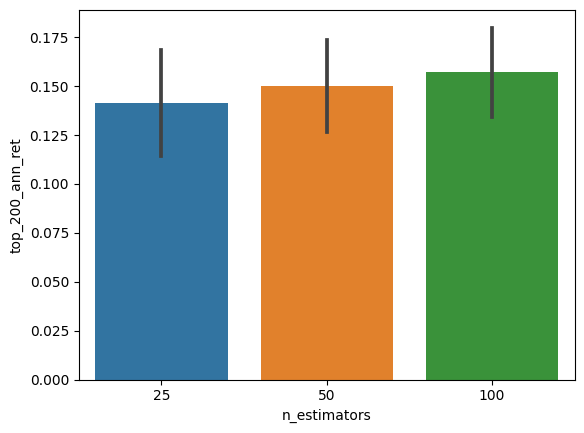

In [ ]:
sns.barplot(df_rf, x="n_estimators", y="top_200_ann_ret", errorbar="sd");

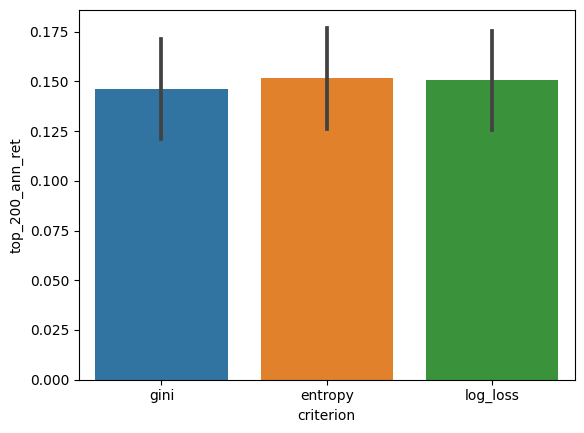

In [ ]:
sns.barplot(df_rf, x="criterion", y="top_200_ann_ret", errorbar="sd");

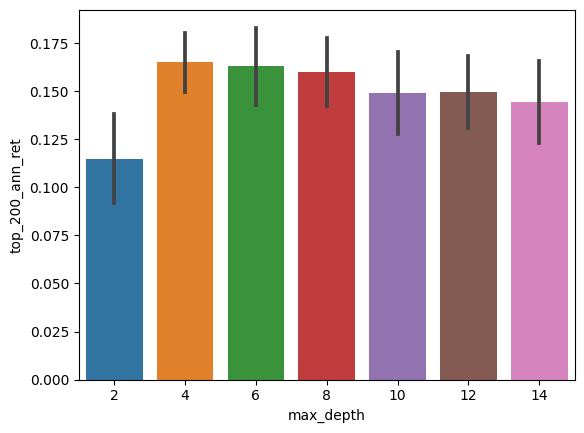

In [ ]:
sns.barplot(df_rf, x="max_depth", y="top_200_ann_ret", errorbar="sd");

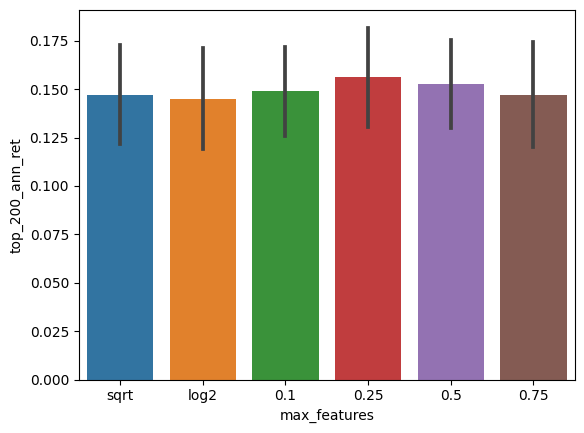

In [ ]:
sns.barplot(df_rf, x="max_features", y="top_200_ann_ret", errorbar="sd");

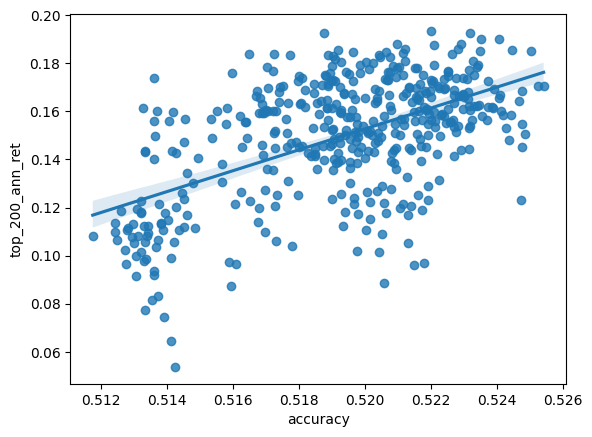

In [ ]:
sns.regplot(data=df_rf, x="accuracy", y="top_200_ann_ret");

In [ ]:
df_rf[["precision", "hp_ann_ret"]].corr() ** 2

,precision,hp_ann_ret
precision,1.000000,0.433422
hp_ann_ret,0.433422,1.000000


In [ ]:
#sns.regplot(data=df_rf, x="hp_ann_ret", y="top_200_ann_ret")

In [ ]:
df_rf.sort_values("top_200_ann_ret", ascending=False).head(100)

,model_family,model_name,n_estimators,criterion,max_depth,max_features,accuracy,precision,recall,roc_auc,hp_ann_ret,hp_sharpe,top_200_ann_ret,top_200_sharpe
116,random_forest,"RandomForestClassifier(criterion='log_loss', m...",100,log_loss,6,0.25,0.522016,0.518007,0.555298,0.531644,0.093743,0.679610,0.193460,0.987461
76,random_forest,"RandomForestClassifier(criterion='entropy', ma...",50,entropy,8,0.75,0.523193,0.519213,0.553226,0.533430,0.101079,0.718921,0.192609,1.029208
109,random_forest,"RandomForestClassifier(criterion='log_loss', m...",25,log_loss,4,0.25,0.518779,0.514436,0.569928,0.527188,0.095637,0.693899,0.192475,1.010076
33,random_forest,"RandomForestClassifier(max_depth=10, max_featu...",100,gini,10,0.5,0.524072,0.520050,0.553236,0.534477,0.100996,0.710138,0.190202,0.989624
69,random_forest,"RandomForestClassifier(criterion='entropy', ma...",100,entropy,6,0.75,0.523537,0.519531,0.553510,0.533683,0.096698,0.696210,0.190063,0.986459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,random_forest,"RandomForestClassifier(criterion='entropy', ma...",25,entropy,8,NaN,0.522244,0.518458,0.549040,0.532316,0.100617,0.715672,0.169587,0.897145
20,random_forest,"RandomForestClassifier(max_depth=6, max_featur...",25,gini,6,0.75,0.521557,0.517438,0.560540,0.532219,0.097838,0.705307,0.169585,0.950837
57,random_forest,"RandomForestClassifier(criterion='entropy', ma...",50,entropy,4,log2,0.517061,0.513087,0.563101,0.526571,0.085710,0.629664,0.169523,0.937953
18,random_forest,"RandomForestClassifier(max_depth=6, max_featur...",100,gini,6,0.25,0.522405,0.518249,0.558844,0.532285,0.098399,0.705865,0.169481,0.918448


In [ ]:
df_rf.query("n_estimators==100 & criterion=='entropy' & max_depth==4 & max_features=='0.25'")

,model_family,model_name,n_estimators,criterion,max_depth,max_features,accuracy,precision,recall,roc_auc,hp_ann_ret,hp_sharpe,top_200_ann_ret,top_200_sharpe
60,random_forest,"RandomForestClassifier(criterion='entropy', ma...",100,entropy,4,0.25,0.519198,0.515088,0.564736,0.527668,0.088757,0.657323,0.185622,1.007524


In [ ]:
df_rf.groupby(["max_depth"])[["top_200_ann_ret"]].agg([np.mean, np.std, np.min, np.max]).reset_index()

max_depth top_200_ann_ret                              
                       mean       std      amin      amax
0         2        0.113705  0.024821  0.053696  0.161495
1         4        0.162178  0.016854  0.104161  0.192475
2         6        0.158799  0.021521  0.088453  0.187701
3         8        0.156979  0.019712  0.112463  0.192609
4        10        0.143895  0.022385  0.095961  0.180329
5        12        0.144505  0.015898  0.105993  0.175004
6        14        0.139839  0.023079  0.081437  0.174856

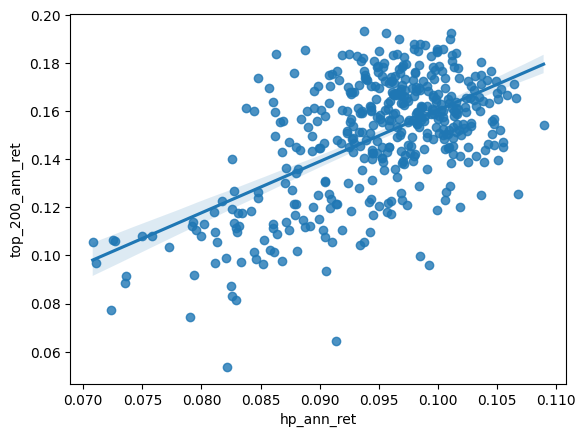

In [ ]:
sns.regplot(data=df_rf, x="hp_ann_ret", y="top_200_ann_ret");

In [ ]:
df_rf[["top_200_ann_ret", "hp_ann_ret"]].corr() ** 2

,top_200_ann_ret,hp_ann_ret
top_200_ann_ret,1.000000,0.338139
hp_ann_ret,0.338139,1.000000


In [ ]:
len(df_rf.query("hp_ann_ret < top_200_ann_ret")) / len(df_rf)

0.9886621315192744